<a href="https://colab.research.google.com/github/Patrick-Setubal/Data_Science_Analytics/blob/main/puc/sprint2/VisaoComputacional/Sprint2_VisaoComputacional.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Definição do Problema

**Problema de Visão computacional**

**Objetivo:** Criar um Modelo de visão computacional que consiga diferenciar minhas duas cachorras "Maeve" e "Amora".

**Dataset:** Foram tiradas 500 fotos de cada uma delas utilizando um smartphone.

# Coleta dos Dados

In [1]:
# Importações das bibliotecas

# Biblioteca para lidar com os dados
import pandas as pd
import numpy as np
import random
import os
from datetime import datetime

# Biblioteca para lidar com gráficos e imagens
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

# Biblioteca de Pre-Processamento
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

# Bibliotecas de Machine learning
from sklearn.model_selection import train_test_split
from tensorflow import keras
from keras import models
from keras import layers
from keras import optimizers
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score # Todos os modos de verificação


## Importando Imagens

In [2]:
!pip install gdown
import gdown
import os
import zipfile
import requests

In [3]:
# Baixar Arquivos
# Cria a pasta de destino se necessário
folder = "/content/dataset"
os.makedirs(folder, exist_ok=True)

# URL do arquivo direto do Google Drive
file_url = 'https://drive.google.com/uc?id=1Zcohw47t2ZpjlJ567eLz6c5-IQod6dlY'

# Caminho da pasta em que iremos baixar o arquivo
output = folder+"/FotosDataset.zip"

# Faz o download do arquivo
gdown.download(file_url, output)

Downloading...
From: https://drive.google.com/uc?id=1Zcohw47t2ZpjlJ567eLz6c5-IQod6dlY
To: /content/dataset/FotosDataset.zip
100%|██████████| 1.16G/1.16G [00:21<00:00, 52.9MB/s]


'/content/dataset/FotosDataset.zip'

In [4]:
# Descompactar Arquivos
with zipfile.ZipFile(output,'r') as zip_ref:
  zip_ref.extractall(folder)

## Criar Dataframe com o Dataset

In [5]:
# Importanto Imagens da amora e da maeve
path_amora = '/content/dataset/Amora Fotos/'
path_maeve = '/content/dataset/Maeve Fotos/'
amora_img_name = [path_amora + name for name in os.listdir(path_amora)]
maeve_img_name = [path_maeve + name for name in os.listdir(path_maeve)]

# Criando Dataframe
df_amora = pd.DataFrame({'imagem': amora_img_name, 'class': '1', 'name': 'amora'})
df_maeve = pd.DataFrame({'imagem': maeve_img_name, 'class': '0', 'name': 'maeve'})
df = pd.concat([df_amora, df_maeve],ignore_index=True)

# Análise exploratória de dados

In [6]:
# Visualizando Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   imagem  1000 non-null   object
 1   class   1000 non-null   object
 2   name    1000 non-null   object
dtypes: object(3)
memory usage: 23.6+ KB


Quantidade de Imagens da Amora e da Maeve
amora    500
maeve    500
Name: name, dtype: int64


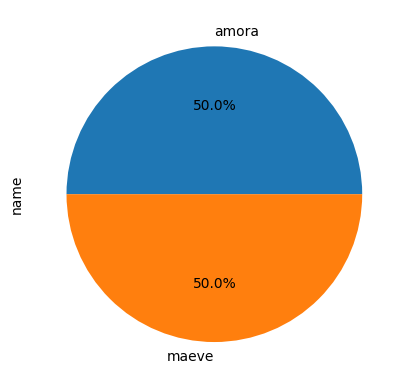

In [7]:
# Comparar quantidade de fotos da Amora e da Maeve
print('Quantidade de Imagens da Amora e da Maeve')
print((df['name']).value_counts())

# Plotar Gráfico de Pizza
df_pie_class = df['name'].value_counts().plot.pie(autopct='%1.1f%%')

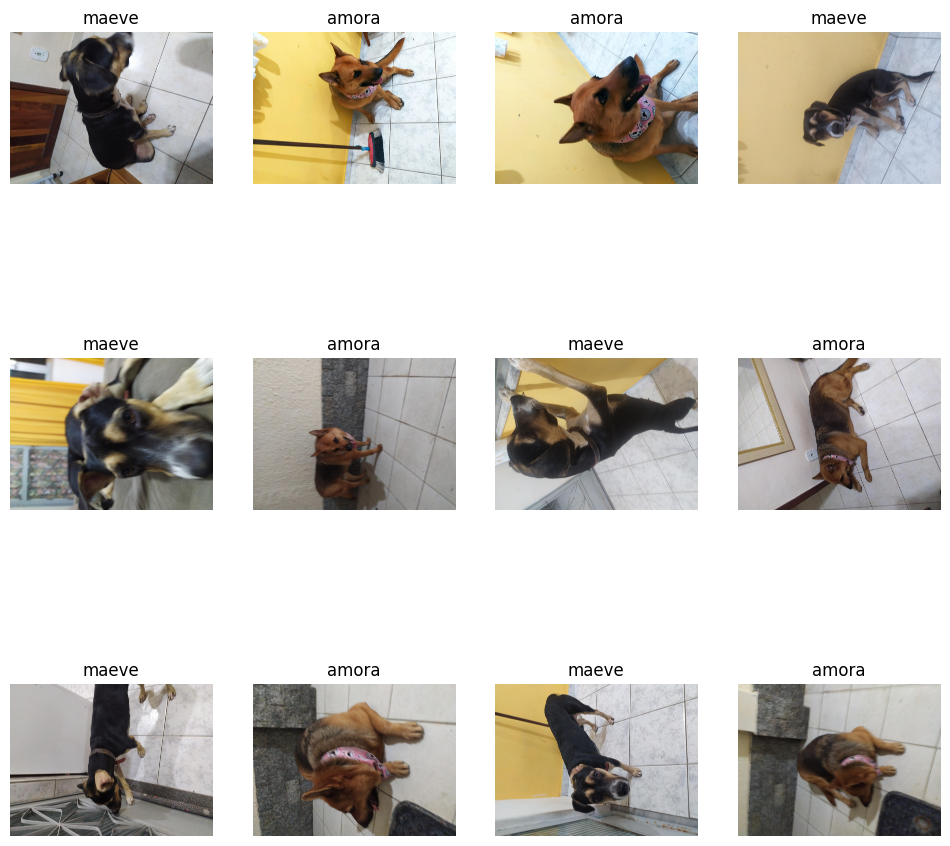

In [8]:
# Exibir 12 imagens do dataset

fig = plt.gcf() # Criar Obj Figura
fig.set_size_inches(3*4, 3*4) # Definir suas proporções

for i in range(12):
  random_index = random.randint(0, len(df['imagem'])-1) # Definir um index randomicamente
  img_path = df['imagem'].iloc[random_index] # Selecionar este Index no dataset
  sp = plt.subplot(3, 4, i + 1) # Definir posições das imagens
  sp.axis('Off') # Remover Linha dos eixos
  img = mpimg.imread(img_path) # criar a imagem
  plt.imshow(img) # Colocar imagem no gráfico
  plt.title(df['name'].iloc[random_index]) # Nomear

plt.show() # Exibir


# Pre-Processamento


In [9]:
# Separando dados de treino e os dados de Teste
train, test = train_test_split(df[['imagem' , 'class', 'name']],
                              test_size=0.3, # definindo porcentagem usado para test
                              random_state=3, # Definindo s Seed
                              shuffle=True, # Definir Dados embaralhados sem ordem
                              stratify=df['class']) # Separação Balanceada


print(f'Train Dataset com: {len(train)} Linhas')
display(train.head())
print(f'Test Dataset com: {len(test)} Linhas')
display(test.head())

Train Dataset com: 700 Linhas


,imagem,class,name
821,/content/dataset/Maeve Fotos/IMG_20230628_2047...,0,maeve
293,/content/dataset/Amora Fotos/IMG_20230628_2032...,1,amora
894,/content/dataset/Maeve Fotos/IMG_20230628_2048...,0,maeve
728,/content/dataset/Maeve Fotos/IMG_20230629_1954...,0,maeve
691,/content/dataset/Maeve Fotos/IMG_20230629_1957...,0,maeve


Test Dataset com: 300 Linhas


,imagem,class,name
508,/content/dataset/Maeve Fotos/IMG_20230628_2042...,0,maeve
68,/content/dataset/Amora Fotos/IMG_20230628_2031...,1,amora
346,/content/dataset/Amora Fotos/IMG_20230628_2015...,1,amora
974,/content/dataset/Maeve Fotos/IMG_20230628_2043...,0,maeve
56,/content/dataset/Amora Fotos/IMG_20230628_2010...,1,amora


In [10]:
# Configurando o ImageDataGenerator para o set de treino, Aumentando o dataset e criar o conjunto de validação
train_datagen = ImageDataGenerator(validation_split=0.2, # Criar 20% para Validação
                                  rescale = 1./255, # Normalizando os dados do pixel
                                  width_shift_range=0.2, # Deslocamento horizontal aleatório
                                  height_shift_range=0.2, # Deslocamento vertical aleatório
                                  rotation_range=40, # Definir range de rotação das imagens
                                  shear_range=0.2, # Distorcer forma da imagem
                                  zoom_range=0.2, # Range de zoom
                                  horizontal_flip=True, # Podem ser invertidas horizontalmente
                                  fill_mode='nearest') # preencher pixel criado utilizando os pixeis mais próximos

# Configurando set de treino
test_datagen = ImageDataGenerator(rescale=1./255) # Normalizando os dados do pixel

batch_size = 32
# Gerando imagens para Treino utilizando a configuração do train_datagen
train_generator = train_datagen.flow_from_dataframe(
    dataframe = train,      # Definir Dataset inteiro
    x_col="imagem",         # Valor de x
    y_col="class",          # Valor de Y
    target_size=(150, 150), #Altura e largura das Imagens
    batch_size = batch_size,          # Numero de imagens geradas por lote
    class_mode="binary",    # Definindo dados Binarios 0 ou 1
    subset="training",      # Definindo dados Usados para training
)

# Gerando imagens para Validação utilizando a configuração do train_datagen
val_generator = train_datagen.flow_from_dataframe(
    dataframe = train,      # Definir Dataset inteiro
    x_col="imagem",         # Valor de x
    y_col="class",          # Valor de Y
    target_size=(150, 150), #Altura e largura das Imagens
    batch_size = batch_size,          # Numero de imagens geradas por lote
    class_mode="binary",    # Definido dados Binarios 0 ou 1
    subset="validation",      # Definindo dados Usados para training
)

# Gerando imagens para teste utilizando a configuração do test
test_generator = test_datagen.flow_from_dataframe(
    dataframe = test,       # Definir Dataset inteiro
    x_col="imagem",         # Valor de x
    y_col="class",          # Valor de Y
    target_size=(150,150),  #Altura e largura das Imagens
    batch_size = batch_size,          # Numero de imagens geradas por lote
    class_mode="binary"     # Definindo dados Binarios 0 ou 1
)


Found 560 validated image filenames belonging to 2 classes.
Found 140 validated image filenames belonging to 2 classes.
Found 300 validated image filenames belonging to 2 classes.


Found 1 validated image filenames belonging to 1 classes.


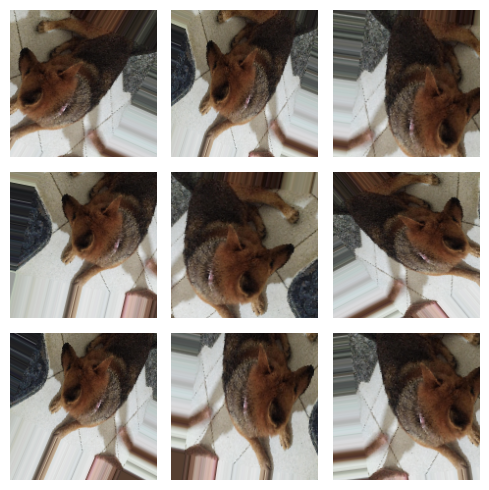

In [11]:
# Visualizando Exemplo de imagens geradas

# Pegando um registro do dataframe
line = df.iloc[3:4]

# Utilizar configuração do train_datagen para gerar imagens exemplos
sample_generator = train_datagen.flow_from_dataframe(
    dataframe = line, # Definir Dataset
    x_col="imagem",   # Definir X
    y_col="class",    # Definir X
    target_size=(150,150),  # Definir
    class_mode="categorical"
)

# Definir Tamanho da Figura
plt.figure(figsize=(5, 5))
for i in range(9):
    plt.subplot(3, 3, i+1) # Definir Local para cada Figura
    for x_batch, y_batch in sample_generator:
        image = x_batch[0]
        plt.imshow(image) # Converter Matriz em imagem
        plt.axis('Off') # Remover Eixos
        break

# Plotar Imagens Exemplos
plt.tight_layout()
plt.show()

As imagens geradas pelo ImageDataGenerator são alterações validas das imagens verdadeiras

In [12]:
# Configurando Modelo de Deep Leraning CNN (Rede neural convolucional)

# Iniciando modelos de redes neurais sequenciais
model = models.Sequential()

# Adicionando Camada inicial
model.add(
    layers.Conv2D(32, # Camada 2D com 32 Filtros
                  # Começaremos a camada com menos filtros para detecção de características mais simples,
                  # como bordas, texturas e cores básicas.

                  (3,3), # Definindo dimensão do filtro 3x3
                  activation='relu', # Função de Ativação a ser usada
                  input_shape=(150,150,3 ) # Dimensão de Entrada
                  )
)

# Para reduzir a dimensionalidade dos recursos extraídos e aumentar a eficiência do modelo utilizaremos o MaxPooling após cada Camada.
model.add(layers.MaxPooling2D( (2,2))) # Adicionando Max Pollind 2D 2x2

# Adicionando Demais Camadas Ao modelo
# Aumentaremos os filtros conforme as camadas para aumentar o nivel características
# Capturadas, possibilitando encontrar mais detalhes.
model.add(layers.Conv2D(64 , (3,3) , activation='relu'))
model.add(layers.MaxPooling2D( (2,2)))

model.add(layers.Conv2D(128 , (3,3) , activation='relu'))
model.add(layers.MaxPooling2D( (2,2)))

model.add(layers.Conv2D(128 , (3,3) , activation='relu'))
model.add(layers.MaxPooling2D( (2,2)))

# Adicionando Camada de achatamento para transformar em um vetor unidimensional
model.add(layers.Flatten() )
# Adicionando camada de Dropout, tecnica de regularização usada para reduzir o overfitting
model.add(layers.Dropout(0.25))
# Adicionando uma camada densa onde unificando os aprendizados anteriores em 512 neuronios
model.add(layers.Dense( 512 ,activation='relu' ))
# Adicionando camada de Dropout
model.add(layers.Dropout(0.25))
# Adicionando ultima camada densa saindo com apenas um neurônio, para obter uma saída de 0 a 1
model.add(layers.Dense( 1 , activation='sigmoid' ) )


In [13]:
# Exibir Arquitetura do Modelo
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [14]:
# Configurar Modelo para Treino
model.compile(optimizer='adam', # Parâmetro de Otimização, ajusta a taxa de aprendizado automaticamente durante o treinamento
              loss='binary_crossentropy', # Medir o quão bem o modelo está se saindo durante o treinamento.
              metrics=['accuracy']) # Métrica de Performance

# Treinamento do modelo

In [15]:
# Determine quantas imagens você tem no conjunto de treinamento e validação
total_train_images = len(train_generator.filenames)
total_val_images = len(val_generator.filenames)

# Definir lotes
steps_per_epoch = total_train_images // batch_size # para usar no treino
validation_steps = total_val_images // batch_size # para usar na validação

# Definir Épocas
epochs = 10


print(f'''
Total de Imagens Treino: {total_train_images}; Validação: {total_val_images}
Valor do "steps_per_epoch" Treino: {steps_per_epoch}; Validation: {validation_steps}
Valor do "Batch_size": {batch_size}
Valor de "epochs": {epochs}

Total de imagens {batch_size} * {steps_per_epoch} * {epochs} = {batch_size*steps_per_epoch*epochs} Imagens.
''')


Total de Imagens Treino: 560; Validação: 140
Valor do "steps_per_epoch" Treino: 17; Validation: 4
Valor do "Batch_size": 32
Valor de "epochs": 10

Total de imagens 32 * 17 * 10 = 5440 Imagens.



In [16]:
# Meu steps_per_epoch * epochs não pode passar de 112 logo vou definir 10 para cada.

# Treinar o Modelo
history = model.fit_generator(
                            train_generator, # Definir o Gerador de Imagens Para treino
                            steps_per_epoch = steps_per_epoch, # Definir tamanho dos Lotes de treinamento
                            epochs = epochs, # N° de vezes que vou Percorrer variações do mesmo dataset
                            validation_data = val_generator, # Definir o Gerador de Imagens Para validação do modelo
                            validation_steps = validation_steps) # Definir tamanho dos lotes de treino por validação

<ipython-input-16-ccbdf440a9d5>:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/10
17/17 [==============================] - 173s 10s/step - loss: 0.7048 - accuracy: 0.5057 - val_loss: 0.6888 - val_accuracy: 0.5547
Epoch 2/10
17/17 [==============================] - 171s 10s/step - loss: 0.6882 - accuracy: 0.5189 - val_loss: 0.6661 - val_accuracy: 0.7812
Epoch 3/10
17/17 [==============================] - 170s 10s/step - loss: 0.6100 - accuracy: 0.7045 - val_loss: 0.5125 - val_accuracy: 0.8516
Epoch 4/10
17/17 [==============================] - 164s 10s/step - loss: 0.4311 - accuracy: 0.8277 - val_loss: 0.3620 - val_accuracy: 0.8359
Epoch 5/10
17/17 [==============================] - 171s 10s/step - loss: 0.3590 - accuracy: 0.8428 - val_loss: 0.3261 - val_accuracy: 0.8750
Epoch 6/10
17/17 [==============================] - 179s 11s/step - loss: 0.2644 - accuracy: 0.9110 - val_loss: 0.3808 - val_accuracy: 0.8594
Epoch 7/10
17/17 [==============================] - 164s 10s/step - loss: 0.2167 - accuracy: 0.9110 - val_loss: 0.2266 - val_accuracy: 0.9219
Epoch 

# Analisando alguns Resultados com Imagens

1/1 [==============================] - 1s 680ms/step


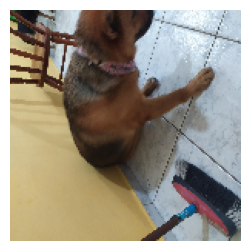

Label:  1.0
Previsão:  1
Resultado:  Correto
Prediction:  [0.9939304]


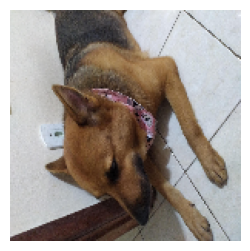

Label:  1.0
Previsão:  1
Resultado:  Correto
Prediction:  [0.99746686]


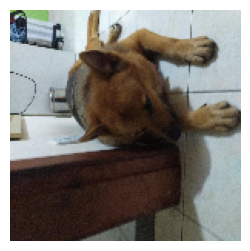

Label:  1.0
Previsão:  1
Resultado:  Correto
Prediction:  [0.9985998]


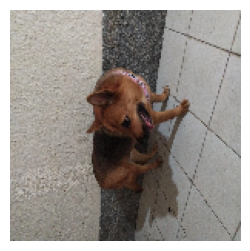

Label:  1.0
Previsão:  1
Resultado:  Correto
Prediction:  [0.99345315]


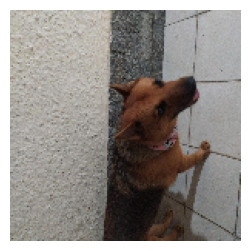

Label:  1.0
Previsão:  1
Resultado:  Correto
Prediction:  [0.99233156]


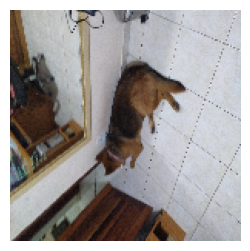

Label:  1.0
Previsão:  1
Resultado:  Correto
Prediction:  [0.9685258]


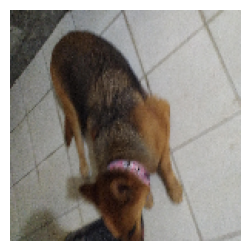

Label:  1.0
Previsão:  1
Resultado:  Correto
Prediction:  [0.9927274]


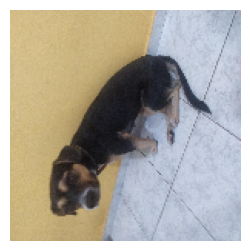

Label:  0.0
Previsão:  0
Resultado:  Correto
Prediction:  [0.00351108]


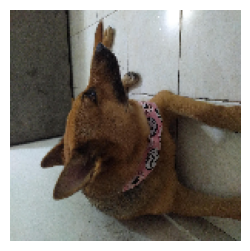

Label:  1.0
Previsão:  1
Resultado:  Correto
Prediction:  [0.99690574]


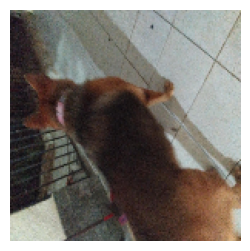

Label:  1.0
Previsão:  1
Resultado:  Correto
Prediction:  [0.98795056]


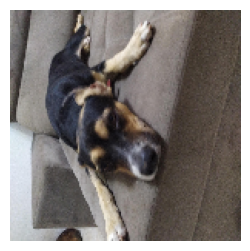

Label:  0.0
Previsão:  0
Resultado:  Correto
Prediction:  [0.02047696]


In [17]:
# Gerar 1 Lote de imagens para Testar o modelo vendo as imagens

# Definindo 0 para Maeve e 1 Para amora
y_pred = []
y_true = []

# Percorrer Imagens
cont=0
for batch in test_generator:

  # Definir imagem e o label
  images = batch[0]
  labels = batch[1]

  # Prever Imagens do Lote
  predictions = model.predict(images)

  # Percorrer cada imagem do lote
  for i in range(len(images)):
    # Definir Unidades
    label = labels[i]
    image = images[i]
    prediction = predictions[i]

    # Traduzindo
    previsao = 1 if prediction >= 0.5 else 0 # Previsão
    resultado = 'Correto' if previsao == label else 'Errado' # Resultado

    # Definindo parametros
    y_pred.append(int(previsao))
    y_true.append(int(label))

    # Criando Imagem
    plt.figure(figsize=(3, 3))
    plt.imshow(images[i])
    plt.axis('Off')
    plt.show()

    # Imprime os resultados da classificação das imagens
    print("Label: ", label)
    print("Previsão: ", previsao)
    print("Resultado: ", resultado)
    print("Prediction: ", prediction)
    cont+=1
    if cont > 10:
      break

  if cont > 10:
    break

  # Será Plotado apenas 10 para não ficar muita informação no projeto,
  # depois será feito o teste sem a plotagem de cada imagem


Accuracy:  1.0
Precision:  1.0
Recall:  1.0
F1:  1.0


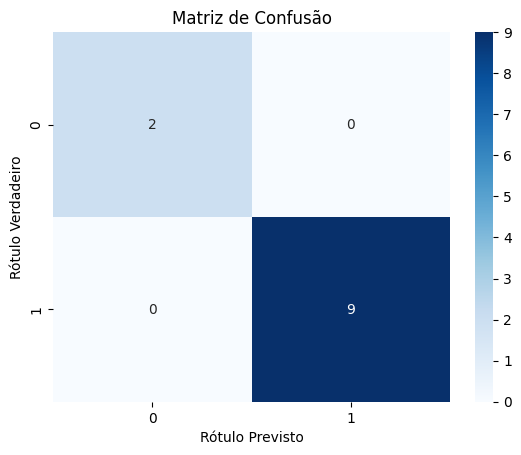

In [18]:
# Verificar métricas das 10 imagens acima plotadas a cima
# Verificar Métricas
print('Accuracy: ',accuracy_score(y_true, y_pred))
print('Precision: ',precision_score(y_true, y_pred))
print('Recall: ',recall_score(y_true, y_pred))
print('F1: ',f1_score(y_true, y_pred))

# Criar Matriz de confusão
cm = confusion_matrix(y_true, y_pred)

# Plotar Matriz
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusão")
plt.xlabel("Rótulo Previsto")
plt.ylabel("Rótulo Verdadeiro")
plt.show()

# Exportando modelo

In [19]:
# Nome do Modelo
name_model = 'Model_Maeve_e_Amora_'+datetime.now().strftime('%d-%m-%Y %H:%M')+'.h5'

path_model = '/content/drive/MyDrive/Codigos/Pos PUC/Sprint 2'

# salvando o modelo
model.save("%s/%s" % (path_model, name_model))
print("Modelo salvo com o nome: ", name_model)

Modelo salvo com o nome:  Model_Maeve_e_Amora_23-07-2023 01:48.h5


# Importando Modelo

In [20]:
loaded_model = keras.models.load_model("%s/%s" % (path_model, name_model))
print("Modelo %s carregado com sucesso" % (name_model))

Modelo Model_Maeve_e_Amora_23-07-2023 01:48.h5 carregado com sucesso


In [21]:
# Fazer previsões usando todo o test_generator
filenames = test_generator.filenames
nb_samples = len(filenames)

predict = loaded_model.predict_generator(test_generator,verbose=1)

<ipython-input-21-cb5b62dacc74>:5: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predict = loaded_model.predict_generator(test_generator,verbose=1)


10/10 [==============================] - 61s 6s/step


In [22]:
y_pred = []
y_true = []
cont = 0

# Percorrer todos os dados do test_generator em um único loop
for batch in test_generator:
  # Definir imagens e rótulos do lote
  images = batch[0]
  labels = batch[1]

  # Prever imagens do lote
  predictions = loaded_model.predict(images)

  # Traduzir as previsões em rótulos binários (0 ou 1) com base no limite de probabilidade
  y_pred.extend((predictions >= 0.5).astype(int))

  # Definir rótulos verdadeiros
  y_true.extend(labels)

  cont += len(images)
  if cont > 300:
      break



1/1 [==============================] - 0s 396ms/step


# Resultado Final

Accuracy:  0.9759036144578314
Precision:  0.9545454545454546
Recall:  1.0
F1:  0.9767441860465117


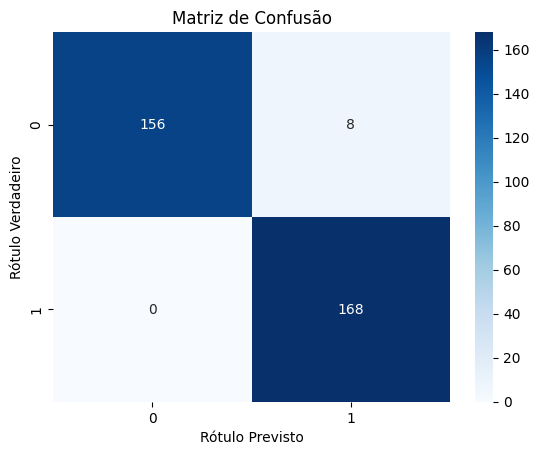

In [23]:
# Verificar métricas de todo dataset de teste
# Verificar Métricas
print('Accuracy: ',accuracy_score(y_true, y_pred))
print('Precision: ',precision_score(y_true, y_pred))
print('Recall: ',recall_score(y_true, y_pred))
print('F1: ',f1_score(y_true, y_pred))

# Criar Matriz de confusão
cm = confusion_matrix(y_true, y_pred)

# Plotar Matriz
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusão")
plt.xlabel("Rótulo Previsto")
plt.ylabel("Rótulo Verdadeiro")
plt.show()